In [ ]:
# Function to filter mne raw signal
def filter_signal(raw, l_freq, h_freq, picks=None):
    raw.filter(l_freq, h_freq, picks=picks)
    #raw.plot(block=True) # Plot the mne raw EEG filtered data
    return raw
    
    
# This section processes the data, and creates files inside the original folder structure.
import numpy as np
import mne
import scipy.io as sio
import hdf5storage
import os
import math



clean_data_dir = '//uni.au.dk/dfs/Tech_EarEEG/Students/RD2022_Artefact_AkselStark/data/1A/study_1A_mat_simple_cleaned'
#raw_data_dir = '//uni.au.dk/dfs/Tech_EarEEG/Students/RD2022_Artefact_AkselStark/data/1A/study_1A_mat_simple'
raw_data_dir = '../data/study_1A_mat_simple/S_01/night_1'

# Run through all the cleaned EEG files
for subdir, dirs, files in sorted(os.walk(raw_data_dir)):
    for file in files:
        if "EEG" in file and not "250hz" in file:
            print(os.path.join(subdir, file))
            data_raw = hdf5storage.loadmat(os.path.join(subdir, file))
            print('Raw data loaded')

            # Labels are needed for MNE. Imported, reshaped and converted to list
            labels = data_raw['chanlabels'].reshape(25).tolist() #channel labels needed to load data with MNE
        
            # First load a nights data into mne, then resample to 250 hz, then get the numpy array out again with ._data
            # Data is converted to 32 bit
            npdata = np.nan_to_num(data_raw['data'])# change nan to 0 to enable downsampling
            
            mne_data_raw = mne.io.RawArray(npdata, mne.create_info(labels,500))
            
        # if the file is filtered, load that in as well
        if "250hz" in file:
            print(os.path.join(subdir, file))
            #load the filtered data from numpy file
            data = np.load(os.path.join(subdir, file)) 
            mne_data_filtered = mne.io.RawArray(data, mne.create_info(labels,250))
            
# Plot both mne signals
mne_data_raw.plot(block=True)
mne_data_filtered.plot(block=True)

print("debug")

In [ ]:
import matplotlib.pyplot as plt
#Convert to numpy array
def convert_to_numpy(mne_data):
    return mne_data._data

raw = convert_to_numpy(mne_data_raw)
filtered = convert_to_numpy(mne_data_filtered)

# Compare the 2 signals by plotting segments of the data
def plot_segments(raw, filtered, sectionLength):
    # Plot the first 10 seconds of the raw data
    raw_segment = raw[0:sectionLength*2,:]
    filtered_segment = filtered[0:sectionLength,:]
    plt.plot(raw_segment)
    plt.plot(filtered_segment)
    plt.show()
    
plot_segments(raw, filtered, 1000)

In [1]:
# # Test if filtering works, by plotting filtered and unfiltered data

import matplotlib.pyplot as plt
from dataset_copy import EEGDataset
import numpy as np
import os
import random

raw_data_dir = '../data'

segment_length = 2000

filtered_data = EEGDataset(raw_data_dir,1, segment_length,skips = 5, filtered = True)
unfiltered_data = EEGDataset(raw_data_dir,1, segment_length,skips = 5, filtered = False)



Classification dataset version: apr-10-22-v2
../data/study_1A_mat_simple/S_01/night_1/artefact_annotations.npy
../data/study_1A_mat_simple/S_01/night_1/EEG_raw_250hz.npy
../data/study_1A_mat_simple/S_01/night_2/artefact_annotations.npy
../data/study_1A_mat_simple/S_01/night_2/EEG_raw_250hz.npy
../data/study_1A_mat_simple/S_01/night_3/artefact_annotations.npy
../data/study_1A_mat_simple/S_01/night_3/EEG_raw_250hz.npy
../data/study_1A_mat_simple/S_01/night_4/artefact_annotations.npy
../data/study_1A_mat_simple/S_01/night_4/EEG_raw_250hz.npy
../data/study_1A_mat_simple/S_02/night_1/artefact_annotations.npy
../data/study_1A_mat_simple/S_02/night_1/EEG_raw_250hz.npy
../data/study_1A_mat_simple/S_02/night_2/artefact_annotations.npy
Lables for night 0 loaded
../data/study_1A_mat_simple/S_02/night_2/EEG_raw_250hz.npy
Night 0 data loaded
../data/study_1A_mat_simple/S_01/night_1/artefact_annotations.npy
../data/study_1A_mat_simple/S_01/night_1/EEG_raw_250hz_unfiltered.npy
../data/study_1A_mat_si

Index:  14876
filtered


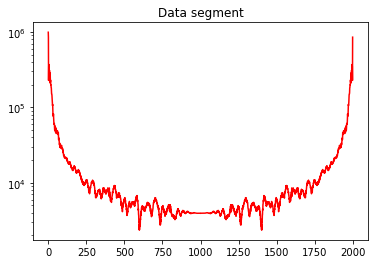

unfiltered


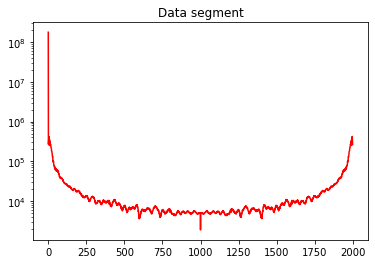

In [8]:

for i in range(1):
    index = random.randint(0,filtered_data.__len__())
    print("Index: ", index)
    filt = filtered_data[index]
    unfilt = unfiltered_data[index]
    if filt[1]:color = 'red' # Red if artefact, green otherwise
    else: color = 'green'
    
    
    print("filtered")
    plt.semilogy(filt[0][0:segment_length], color = color)
    plt.title("Data segment") 
    plt.show()
    
    print("unfiltered")
    plt.semilogy(unfilt[0][0:segment_length], color = color)
    plt.title("Data segment") 
    plt.show()

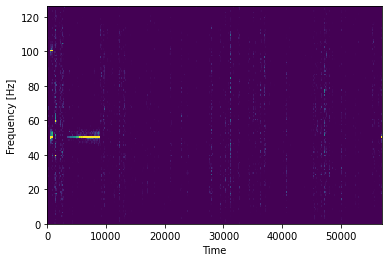

In [10]:
import numpy as np
import mne
import scipy.io as sio
import hdf5storage
import os
import math
from scipy import signal


from scipy.fft import fftshift

import matplotlib.pyplot as plt


raw_data_dir = '../data'


Sxx = np.load("../data/study_1A_mat_simple/S_01/night_1/spectrogram.npy")

plt.pcolormesh(Sxx[0],norm=plt.Normalize(vmin=0, vmax=1))
                
plt.ylabel('Frequency [Hz]')

plt.xlabel('Time')

plt.show()


In [9]:
import numpy as np
import mne
import scipy.io as sio
import hdf5storage
import os
import math
from scipy import signal
from dataset_spectrogram import EEGDataset



from scipy.fft import fftshift

import matplotlib.pyplot as plt

ds1 = EEGDataset('../data', skips = 0)


Sxx = ds1[211][0]

plt.pcolormesh(Sxx,norm=plt.Normalize(vmin=0, vmax=1))
                
plt.ylabel('Frequency [Hz]')

plt.xlabel('Time')

plt.show()


../data/study_1A_mat_simple/S_01/night_1/spectrogram_bad_segments.npy
../data/study_1A_mat_simple/S_01/night_1/spectrogra_good_segments.npy
Memory usage: 994.168473 MB



KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>